In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [8]:
dataSet = pd.read_csv("Position_Salaries.csv")

x = dataSet.iloc[:, 1:-1].values
y = dataSet.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [13]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)

y_scaled = sc_y.fit_transform(y)

In [19]:
regressor = SVR(kernel='rbf')

regressor.fit(x_scaled,y_scaled)

y_pred = regressor.predict(x_scaled)

c:\Users\tymon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

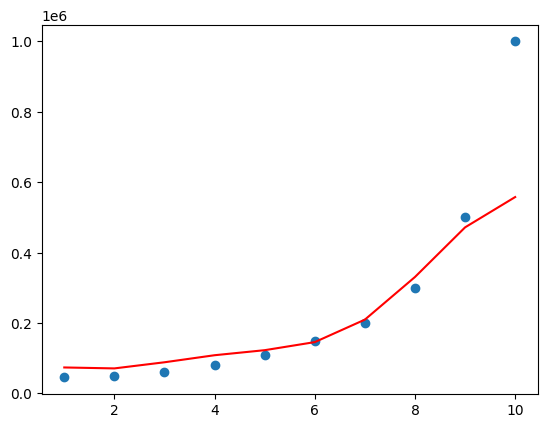

In [25]:
plt.scatter(x,y)

plt.plot(x, sc_y.inverse_transform(y_pred.reshape(-1,1)),color="red")
plt.show()